In [ ]:
'https://swapi.dev/api/people/'

In [1]:
import requests
import pandas as pd
def fetch_characters():
    characters = []
    url = 'https://swapi.dev/api/people/'
    while url:
        response = requests.get(url)
        data = response.json()
        for character in data['results']:
            name = character['name']
            eye_color = character['eye_color']
            vehicles = len(character['vehicles'])
            mass = character['mass'].replace(',', '') if character['mass'] != 'unknown' else None
            height = character['height'].replace(',', '') if character['height'] != 'unknown' else None
            if height and mass:
                height = float(height)
                mass = float(mass)
                bmi = mass/ (height/100)**2
            else:
                bmi = None
            characters.append([name, eye_color, vehicles, bmi])
            url = data['next']
    return characters
all = fetch_characters()
df = pd.DataFrame(all, columns = ['Name', 'Eye color', 'Vehicle amount', 'BMI'])
df

,Name,Eye color,Vehicle amount,BMI
0,Luke Skywalker,blue,2,26.027582
1,C-3PO,yellow,0,26.892323
2,R2-D2,red,0,34.722222
3,Darth Vader,yellow,0,33.330066
4,Leia Organa,brown,1,21.777778
...,...,...,...,...
77,Grievous,"green, yellow",1,34.079218
78,Tarfful,blue,0,24.837461
79,Raymus Antilles,brown,0,22.351743
80,Sly Moore,white,0,15.149602


In [2]:
import requests 
import pandas as pd 
url = 'https://swapi.dev/api/people/'
response = requests.get(url)
data = response.json()
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [2]:
import requests 
import pandas as pd 
def fetch():
    characters = []
    url = 'https://swapi.dev/api/people/'
    while url:
        response = requests.get(url)
        data = response.json()
        for character in data['results']:
            name = character['name']
            eye_color = character['eye_color']
            vehicles = len(character['vehicles'])
            height = character['height'].replace(',', '') if character['height'] != "unknown" else None
            mass = character['mass'].replace(',', '') if character['mass'] != "unknown" else None
            if height and mass:
                height = float(height)
                mass = float(mass)
                bmi = mass / (height/100)**2
            else:
                bmi = None
            characters.append([name, eye_color, vehicles, bmi])
            url = data['next']
    return characters
all = fetch()
df = pd.DataFrame(all, columns = ['Name', 'Eye Color', 'Vehicles Amount', 'BMI'])
df

,Name,Eye Color,Vehicles Amount,BMI
0,Luke Skywalker,blue,2,26.027582
1,C-3PO,yellow,0,26.892323
2,R2-D2,red,0,34.722222
3,Darth Vader,yellow,0,33.330066
4,Leia Organa,brown,1,21.777778
...,...,...,...,...
77,Grievous,"green, yellow",1,34.079218
78,Tarfful,blue,0,24.837461
79,Raymus Antilles,brown,0,22.351743
80,Sly Moore,white,0,15.149602


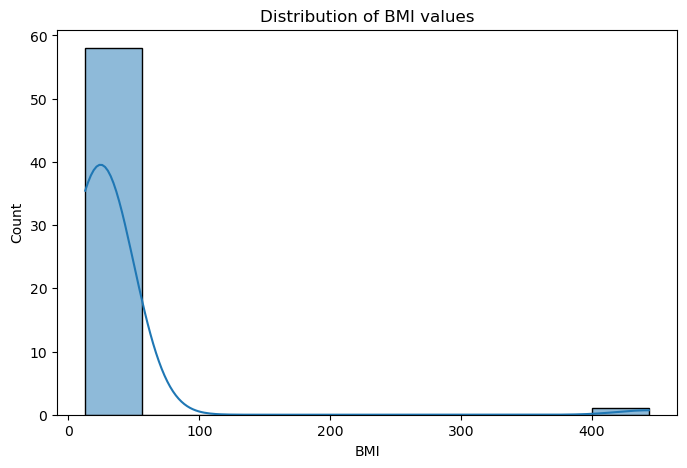

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'].dropna(), bins=10, kde=True)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI values')
plt.show()

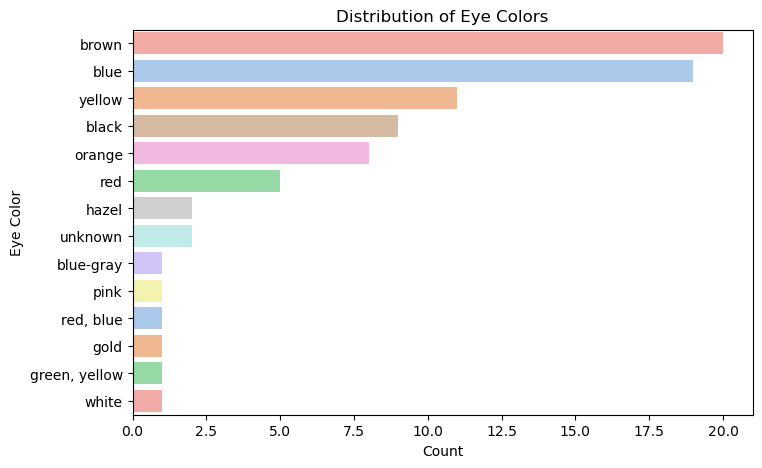

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Eye Color'], order=df['Eye Color'].value_counts().index, hue=df['Eye Color'], legend=False, palette='pastel')
plt.xlabel('Count')
plt.ylabel('Eye Color')
plt.title('Distribution of Eye Colors')
plt.show()